In [3]:
import pandas as pd
import numpy as np
import random
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [4]:
df = pd.read_csv('/content/Occupancy_Estimation.csv')
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [5]:
df.shape

(10129, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [7]:
df=df.drop(["Date","Time"],axis=1)

In [8]:
df.shape

(10129, 17)

In [9]:
df.isnull().sum()

S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [11]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


<Axes: >

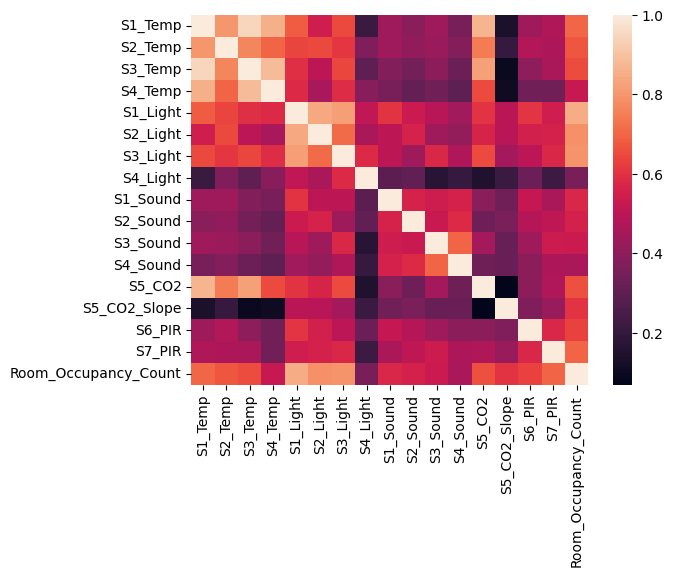

In [14]:
import seaborn as sns
sns.heatmap(df.corr())

In [19]:
X = df.drop(['Room_Occupancy_Count'], axis=1)
X.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0


In [20]:
y=df['Room_Occupancy_Count']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Room_Occupancy_Count, dtype: int64

In [21]:
no_samples = 10
max_iter = 500
X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []

In [22]:
for i in range(no_samples):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)

In [25]:
# Define the SVM model
svm = SVC(max_iter=max_iter)
param_grid = {'C': [0.1, 1, 10,100], 'gamma': [0.01,0.1, 1, 10], 'kernel': ['rbf', 'poly','sigmoid']}
best_params_list = []
best_accuracy_list = []


In [26]:
from sklearn.model_selection import GridSearchCV
for i in range(no_samples):
    # Fit the grid search model
    grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train_list[i], y_train_list[i])

    # Store the best parameters and accuracy
    best_params_list.append(grid_search.best_params_)
    best_accuracy_list.append(grid_search.best_score_)

    # Print the results for the current sample
    print("Sample ", i+1, ":")
    print("Best Parameters: ", grid_search.best_params_)
    print("Best Accuracy: ", grid_search.best_score_)

# Create a pandas DataFrame to store the results
results_df = pd.DataFrame({
    'Sample #': range(1, no_samples+1),
    'Best Accuracy': best_accuracy_list,
    'Best SVM Parameters': best_params_list
})

# Display the results table
print("\nResults Table:")
print(results_df)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Sample  1 :
Best Parameters:  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best Accuracy:  0.9961918194640338
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Sample  2 :
Best Parameters:  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best Accuracy:  0.995768688293371
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Sample  3 :
Best Parameters:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Accuracy:  0.9961918194640338
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Sample  4 :
Best Parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best Accuracy:  0.995345557122708
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Sample  5 :
Best Parameters:  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best Accuracy:  0.9961918194640338
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Sample  6 :
Best Parameters:  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best Accuracy:  0.9944992947813823
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Sample  7 :
Best Parameters:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Accuracy:  0.995768688293371
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Sample  8 :
Best Parameters:  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best Accuracy:  0.9959097320169252
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Sample  9 :
Best Parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best Accuracy:  0.9959097320169252
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Sample  10 :
Best Parameters:  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best Accuracy:  0.9959097320169252

Results Table:
   Sample #  Best Accuracy                         Best SVM Parameters
0         1       0.996192    {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
1         2       0.995769    {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
2         3       0.996192   {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
3         4       0.995346  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
4         5       0.996192    {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
5         6       0.994499    {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
6         7       0.995769   {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
7         8       0.995910    {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
8         9       0.995910  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your

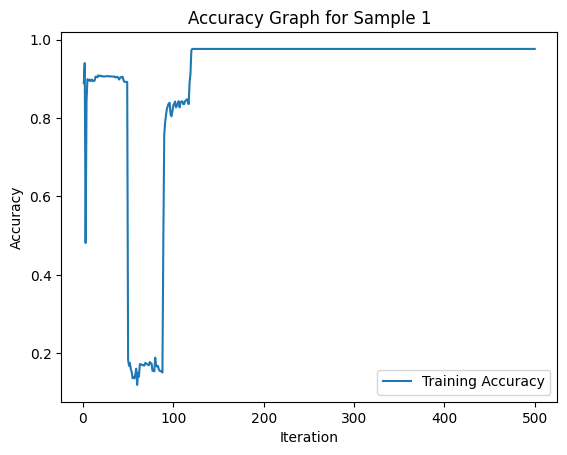

In [35]:
import matplotlib.pyplot as plt
max_accuracy_sample = np.argmax(best_accuracy_list)
X_train = X_train_list[max_accuracy_sample]
y_train = y_train_list[max_accuracy_sample]
X_test = X_test_list[max_accuracy_sample]
y_test = y_test_list[max_accuracy_sample]

svm.set_params(**best_params_list[max_accuracy_sample])
training_accuracy = []
clf = SVC(max_iter=500)
for i in range(1, max_iter+1):
    clf.max_iter = i
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    

plt.plot(range(1, max_iter+1), training_accuracy, label='Training Accuracy')

plt.title("Accuracy Graph for Sample {}".format(max_accuracy_sample+1))
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend()
plt.show()









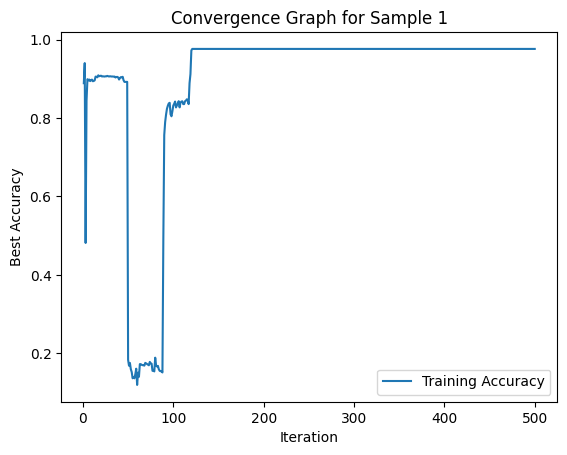

In [36]:
plt.plot(range(1, max_iter+1), training_accuracy, label='Training Accuracy')

plt.title("Convergence Graph for Sample {}".format(max_accuracy_sample+1))
plt.xlabel("Iteration")
plt.ylabel("Best Accuracy")
plt.legend()
plt.show()